# Stock Analysis - Capstone Project

As part of our capstone project on technical analysis of stocks, we will be using this notebook to prepare the required datasets and apply the required formulae.

### Importing libraries and stock data

In [32]:
# import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob

from datetime import datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')


In [33]:
# lets read S&P500.csv file for analysis
snp500_df = pd.read_csv('S&P500.csv')
snp500_df.shape

(2517, 7)

In [34]:
# Lets check out the head of dataset/dataframe snp500_df
snp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-10-2010,1143.489990,1150.300049,1139.420044,1146.239990,1146.239990,4298910000
1,04-10-2010,1144.959961,1148.160034,1131.869995,1137.030029,1137.030029,3604110000
2,05-10-2010,1140.680054,1162.760010,1140.680054,1160.750000,1160.750000,4068840000
3,06-10-2010,1159.810059,1162.329956,1154.849976,1159.969971,1159.969971,4073160000
4,07-10-2010,1161.569946,1163.869995,1151.410034,1158.060059,1158.060059,3910550000


In [35]:
# Check the datatypes of each columns in snp500_df
snp500_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [36]:
# Lets only keep columns required for analysis
snp500_df = snp500_df[['Date', 'Close', 'Volume']]

# Change the Date column datatype from object to Date-Time
snp500_df['Date'] = pd.to_datetime(snp500_df['Date'], format='%d-%m-%Y')

# Make the columns name proper
snp500_df = snp500_df.rename(columns={'Close':'S&P500', 'Volume':'S&P500_Vol'})

# Set Date column as index
snp500_df = snp500_df.set_index('Date')
snp500_df.head()

,S&P500,S&P500_Vol
Date,,
2010-10-01,1146.239990,4298910000
2010-10-04,1137.030029,3604110000
2010-10-05,1160.750000,4068840000
2010-10-06,1159.969971,4073160000
2010-10-07,1158.060059,3910550000


In [37]:
# Check for the null values in dataframe
snp500_df.isna().sum()

S&P500        0
S&P500_Vol    0
dtype: int64

Observation: There are no null values in the dataframe

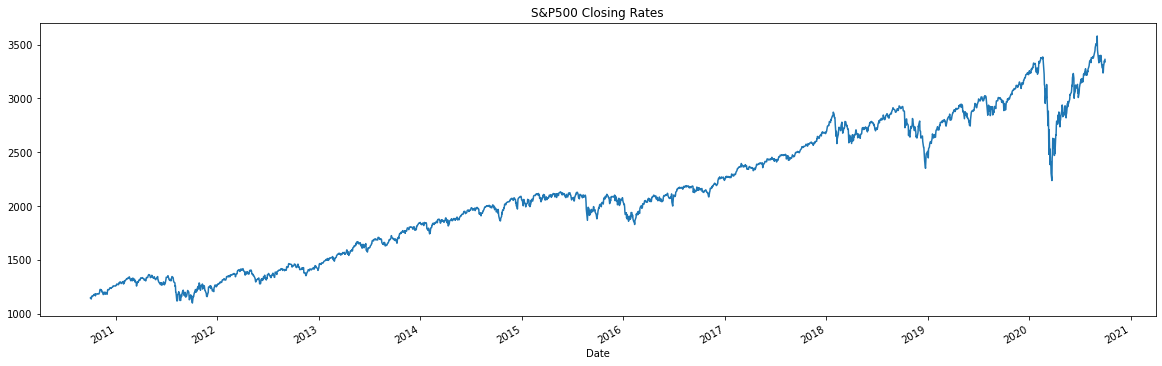

In [38]:
# Lets plot the S&P500 price w.r.to dates
snp500_df['S&P500'].plot(figsize=(20,6))
plt.title('S&P500 Closing Rates')
plt.show(block=False)

* The values for the S&P500 will be taken as share-market index for our analysis.
* We will merge other shares data w.r.to S&P500 dates as it is now our base data.

In [39]:
# Lets write a function to read files from a folder, keep only required columns in dataframe, name the columns properly and join datasets horizontally.

# share_df is share market index dataframe & share_list having different shares file address.
def join_share_df(share_df, share_list): 
    for share in share_list:             
        sector = share.split('\\')[0][:3]                                               # Extracting folder name which is share sector name.
        new_share = (share.split('\\')[1].split('.')[0])                                # Extracting file name which is share name.
        new_share_df = pd.read_csv(share)                                               # Reading share file
        new_share_df = new_share_df[['Date', 'Close', 'Volume']]                        # Keep only required columns in dataframe.
        new_share_df['Date'] = pd.to_datetime(new_share_df['Date'], format='%d-%m-%Y')  # Change datatype to date-time.
           
        # Name the colume properly
        new_share_df = new_share_df.rename(columns={'Close':sector+'_'+new_share, 'Volume':sector+'_'+new_share+'_Vol'})
        new_share_df = new_share_df.set_index('Date')                                                                       # Set Date column as index.
        share_df = share_df.join(new_share_df, how='left')                                                                  # Joining dataframes horizontly over left index.
        
    return share_df


In [40]:
# Read & join the datasets of Aviation sector with the help of join_share_df function.
aviation_share_list = glob.glob('Aviation/*.csv')
complete_share_df = join_share_df(snp500_df, aviation_share_list)

# Read & join the datasets of Finance sector with the help of join_share_df function.
finance_share_list = glob.glob('Finance/*.csv')
complete_share_df = join_share_df(complete_share_df, finance_share_list)

# Read & join the datasets of Pharma & Healthcare sector with the help of join_share_df function.
Pharma_Healthcare_share_list = glob.glob('Pharma_Healthcare/*.csv')
complete_share_df = join_share_df(complete_share_df, Pharma_Healthcare_share_list)

# Read & join the datasets of Technology sector with the help of join_share_df function.
technology_share_list = glob.glob('Technology/*.csv')
complete_share_df = join_share_df(complete_share_df, technology_share_list)

complete_share_df.shape

(2517, 50)

In [41]:
# Checking the head of the dataframe.
complete_share_df.head()

,S&P500,S&P500_Vol,Avi_AAL,Avi_AAL_Vol,Avi_ALGT,Avi_ALGT_Vol,Avi_ALK,Avi_ALK_Vol,Avi_DAL,Avi_DAL_Vol,...,Tec_AMZN,Tec_AMZN_Vol,Tec_FB,Tec_FB_Vol,Tec_GOOG,Tec_GOOG_Vol,Tec_IBM,Tec_IBM_Vol,Tec_MSFT,Tec_MSFT_Vol
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-01,1146.239990,4298910000,9.29,3603800,43.230000,159100.0,12.4475,1663600.0,12.01,9094900.0,...,153.710007,8683400.0,NaN,NaN,261.828613,4466600.0,135.639999,5621200.0,24.379999,62672300.0
2010-10-04,1137.030029,3604110000,9.12,3856800,41.590000,189700.0,12.1425,1512400.0,11.51,7916400.0,...,155.389999,5346500.0,NaN,NaN,260.199707,3895400.0,135.250000,4059900.0,23.910000,98143400.0
2010-10-05,1160.750000,4068840000,9.23,3896600,42.099998,175000.0,12.2150,2567200.0,11.83,12624100.0,...,160.869995,5620000.0,NaN,NaN,268.110046,7040400.0,137.660004,6202500.0,24.350000,78152900.0
2010-10-06,1159.969971,4073160000,9.23,3230200,41.950001,187200.0,12.1875,1043600.0,11.78,10124100.0,...,155.399994,6060800.0,NaN,NaN,266.177307,5545200.0,137.839996,4783000.0,24.430000,50489700.0
2010-10-07,1158.060059,3910550000,9.24,3877700,41.700001,162700.0,11.6250,7682400.0,11.77,7162500.0,...,156.270004,4622000.0,NaN,NaN,264.015411,4809400.0,138.720001,6440800.0,24.530001,50096100.0


### Cleaning the dataset

##### Filtering the dataset

* Now that we have sourced all the data from the 24 stocks, we will have to clean the dataset
* As the first step, we will check the years for which we have the data and check if the entire set is required


In [42]:
# Firstly, we will check the number of years in data data for which we will divide the available dates by the number of working days (252)
Years_Number = len(list(complete_share_df.index.unique()))/252
Years_Number

9.988095238095237

Observation:
* As we can see, we have close to 10 years of data.
* For our analysis, we are tracking trend for 5 years which is the investment duration
* Hence, we will be limiting the data to the __latest 5 years__

In [43]:
stock_data_five_year = complete_share_df[complete_share_df.index > (complete_share_df.index[-1] - relativedelta(years=5))]
stock_data_five_year.head()

,S&P500,S&P500_Vol,Avi_AAL,Avi_AAL_Vol,Avi_ALGT,Avi_ALGT_Vol,Avi_ALK,Avi_ALK_Vol,Avi_DAL,Avi_DAL_Vol,...,Tec_AMZN,Tec_AMZN_Vol,Tec_FB,Tec_FB_Vol,Tec_GOOG,Tec_GOOG_Vol,Tec_IBM,Tec_IBM_Vol,Tec_MSFT,Tec_MSFT_Vol
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-01,1923.819946,3983600000,39.200001,9175100,217.979996,124000.0,80.230003,1230100.0,45.410000,8096500.0,...,520.719971,3768500.0,90.949997,29283700.0,611.289978,1867600.0,143.589996,3880900.0,44.610001,28657900.0
2015-10-02,1951.359985,4378570000,38.630001,12276300,215.589996,107700.0,79.260002,1207900.0,44.869999,10918900.0,...,532.539978,4597800.0,92.070000,37881700.0,626.909973,2684800.0,144.580002,3054400.0,45.570000,41839000.0
2015-10-05,1987.050049,4334490000,40.189999,9421800,216.059998,182100.0,80.910004,1408800.0,46.959999,8629300.0,...,543.679993,3391400.0,94.010002,27292500.0,641.469971,1803600.0,149.039993,5131800.0,46.630001,34369300.0
2015-10-06,1979.920044,4202400000,38.130001,12985800,208.600006,238200.0,74.529999,2874800.0,45.090000,9081000.0,...,537.479980,4502800.0,92.800003,22172800.0,645.440002,2166300.0,148.779999,3018100.0,46.750000,27017200.0
2015-10-07,1995.829956,4666470000,39.310001,10513700,213.839996,172800.0,75.970001,2894600.0,45.990002,11737900.0,...,541.940002,3812100.0,92.400002,24129300.0,642.359985,2092700.0,150.089996,2980800.0,46.799999,27711500.0


In [44]:
# Now we will quickly check the dates in our final dataset.

dates = list(stock_data_five_year.index)

print(dates[:5])
print(dates[-5:])

[Timestamp('2015-10-01 00:00:00'), Timestamp('2015-10-02 00:00:00'), Timestamp('2015-10-05 00:00:00'), Timestamp('2015-10-06 00:00:00'), Timestamp('2015-10-07 00:00:00')]
[Timestamp('2020-09-24 00:00:00'), Timestamp('2020-09-25 00:00:00'), Timestamp('2020-09-28 00:00:00'), Timestamp('2020-09-29 00:00:00'), Timestamp('2020-09-30 00:00:00')]


Observation: We now have the data starting Oct'15 and ending Sep'20; a total of 5 years as we required

##### Handling null values and data types

* We have limited the data to 5 years as the first step
* As the next step, we are going to validate that the data doesn't have any nulls and if it does, we will handle it
* We will also ensure that the data is in the expected data types


In [45]:
# Check the null values in the datafram
stock_data_five_year.isna().sum()

S&P500           0
S&P500_Vol       0
Avi_AAL          0
Avi_AAL_Vol      0
Avi_ALGT         0
Avi_ALGT_Vol     0
Avi_ALK          0
Avi_ALK_Vol      0
Avi_DAL          0
Avi_DAL_Vol      0
Avi_HA           0
Avi_HA_Vol       0
Avi_LUV          0
Avi_LUV_Vol      0
Fin_BCS          0
Fin_BCS_Vol      0
Fin_CS           0
Fin_CS_Vol       0
Fin_DB           0
Fin_DB_Vol       0
Fin_GS           0
Fin_GS_Vol       0
Fin_MS           0
Fin_MS_Vol       0
Fin_WFC          0
Fin_WFC_Vol      0
Pha_BHC          0
Pha_BHC_Vol      0
Pha_JNJ          0
Pha_JNJ_Vol      0
Pha_MRK          0
Pha_MRK_Vol      0
Pha_PFE          0
Pha_PFE_Vol      0
Pha_RHHBY        0
Pha_RHHBY_Vol    0
Pha_UNH          0
Pha_UNH_Vol      0
Tec_AAPL         0
Tec_AAPL_Vol     0
Tec_AMZN         0
Tec_AMZN_Vol     0
Tec_FB           0
Tec_FB_Vol       0
Tec_GOOG         0
Tec_GOOG_Vol     0
Tec_IBM          0
Tec_IBM_Vol      0
Tec_MSFT         0
Tec_MSFT_Vol     0
dtype: int64

*As the number of columns are high, please use the scrollable element to view the entire list*

Observation: There are no NULL values

In [46]:
# Now we will verify if the data types of all columns are as expected
stock_data_five_year.dtypes

S&P500           float64
S&P500_Vol         int64
Avi_AAL          float64
Avi_AAL_Vol        int64
Avi_ALGT         float64
Avi_ALGT_Vol     float64
Avi_ALK          float64
Avi_ALK_Vol      float64
Avi_DAL          float64
Avi_DAL_Vol      float64
Avi_HA           float64
Avi_HA_Vol       float64
Avi_LUV          float64
Avi_LUV_Vol      float64
Fin_BCS          float64
Fin_BCS_Vol      float64
Fin_CS           float64
Fin_CS_Vol       float64
Fin_DB           float64
Fin_DB_Vol       float64
Fin_GS           float64
Fin_GS_Vol       float64
Fin_MS           float64
Fin_MS_Vol       float64
Fin_WFC          float64
Fin_WFC_Vol      float64
Pha_BHC          float64
Pha_BHC_Vol      float64
Pha_JNJ          float64
Pha_JNJ_Vol      float64
Pha_MRK          float64
Pha_MRK_Vol      float64
Pha_PFE          float64
Pha_PFE_Vol      float64
Pha_RHHBY        float64
Pha_RHHBY_Vol    float64
Pha_UNH          float64
Pha_UNH_Vol      float64
Tec_AAPL         float64
Tec_AAPL_Vol       int64


In [47]:
# We will convert the volume column of each stock to integer data type
for volume in stock_data_five_year.columns:
    if volume.endswith('_Vol'):
        stock_data_five_year[volume] = pd.to_numeric(stock_data_five_year[volume], downcast='integer', errors = 'coerce')
# Re-Check datatypes
stock_data_five_year.dtypes

S&P500           float64
S&P500_Vol         int64
Avi_AAL          float64
Avi_AAL_Vol        int32
Avi_ALGT         float64
Avi_ALGT_Vol       int32
Avi_ALK          float64
Avi_ALK_Vol        int32
Avi_DAL          float64
Avi_DAL_Vol        int32
Avi_HA           float64
Avi_HA_Vol         int32
Avi_LUV          float64
Avi_LUV_Vol        int32
Fin_BCS          float64
Fin_BCS_Vol        int32
Fin_CS           float64
Fin_CS_Vol         int32
Fin_DB           float64
Fin_DB_Vol         int32
Fin_GS           float64
Fin_GS_Vol         int32
Fin_MS           float64
Fin_MS_Vol         int32
Fin_WFC          float64
Fin_WFC_Vol        int32
Pha_BHC          float64
Pha_BHC_Vol        int32
Pha_JNJ          float64
Pha_JNJ_Vol        int32
Pha_MRK          float64
Pha_MRK_Vol        int32
Pha_PFE          float64
Pha_PFE_Vol        int32
Pha_RHHBY        float64
Pha_RHHBY_Vol      int32
Pha_UNH          float64
Pha_UNH_Vol        int32
Tec_AAPL         float64
Tec_AAPL_Vol       int32


We have now removed extra records, checked that there are no NULL records and also updated data types as required

### Outlier Detection

* As we have cleaned the data, we would first check if there are any extreme outliers in the data before performing analytics

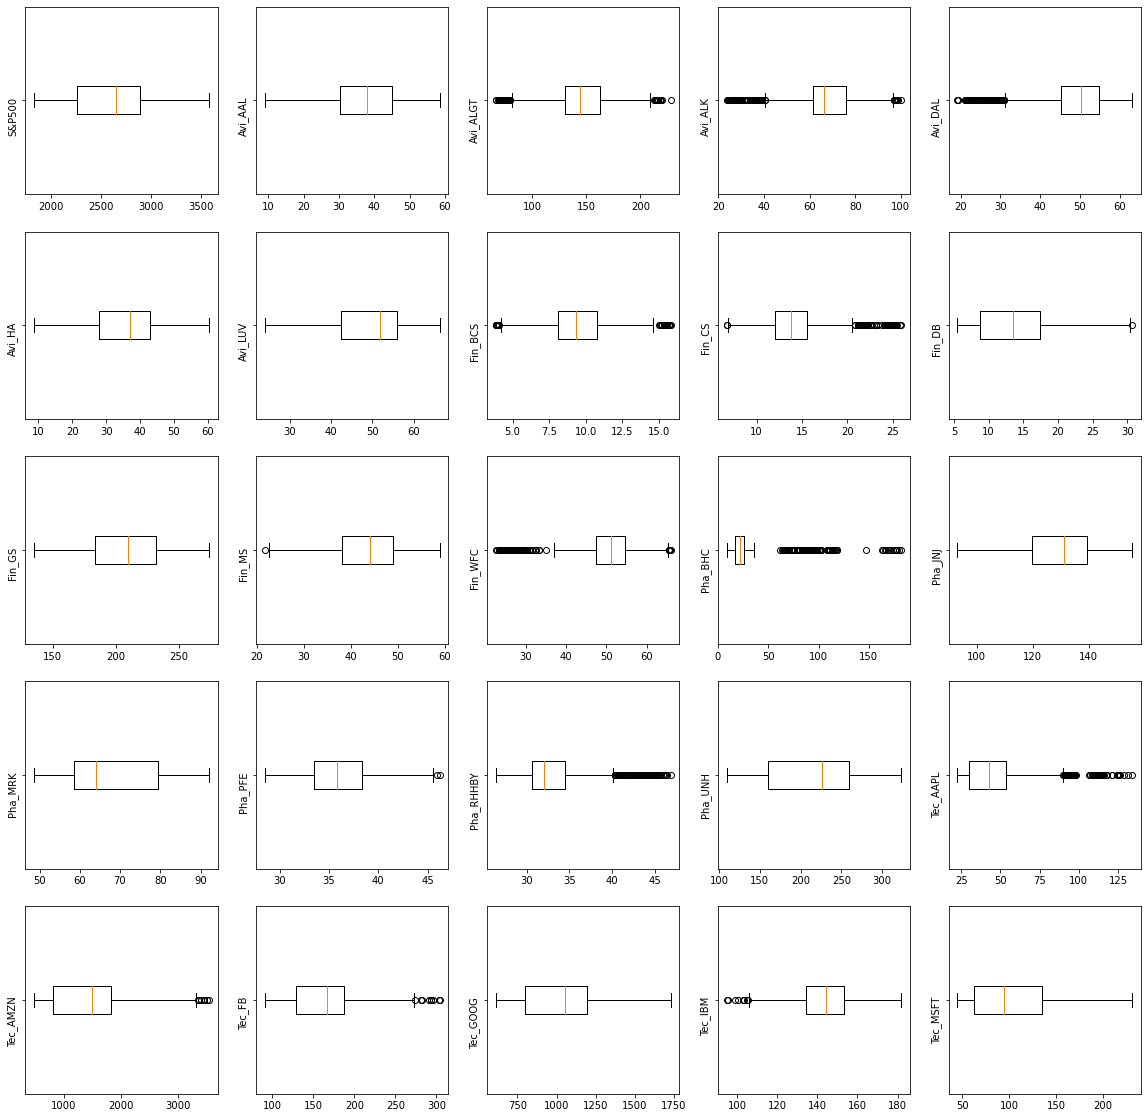

In [48]:
# Lets declare figure/plot size
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111)
i = 1
for share in stock_data_five_year.columns:
    if not(share.endswith('_Vol')):
        plt.subplot(5,5,i)
        i += 1
        # Creating plot
        plt.boxplot(stock_data_five_year[share], vert=0)
        plt.yticks([1],[share], rotation = 90)
         
# show plot
plt.show()

Observations:

* Please note that this is a stock data, so outlier doesn't directly mean incorrect data
* Rather, outliers generally will reflect that the stocks could be showing a trend and isn't stable between a range

In [49]:
# Listing all stocks with outliers
 
share_with_outliers = ['Avi_ALGT','Avi_ALK','Avi_DAL','Fin_BCS','Fin_CS','Fin_WFC','Pha_BHC','Pha_RHHBY','Tec_AAPL','Tec_AMZN','Tec_FB','Tec_IBM']

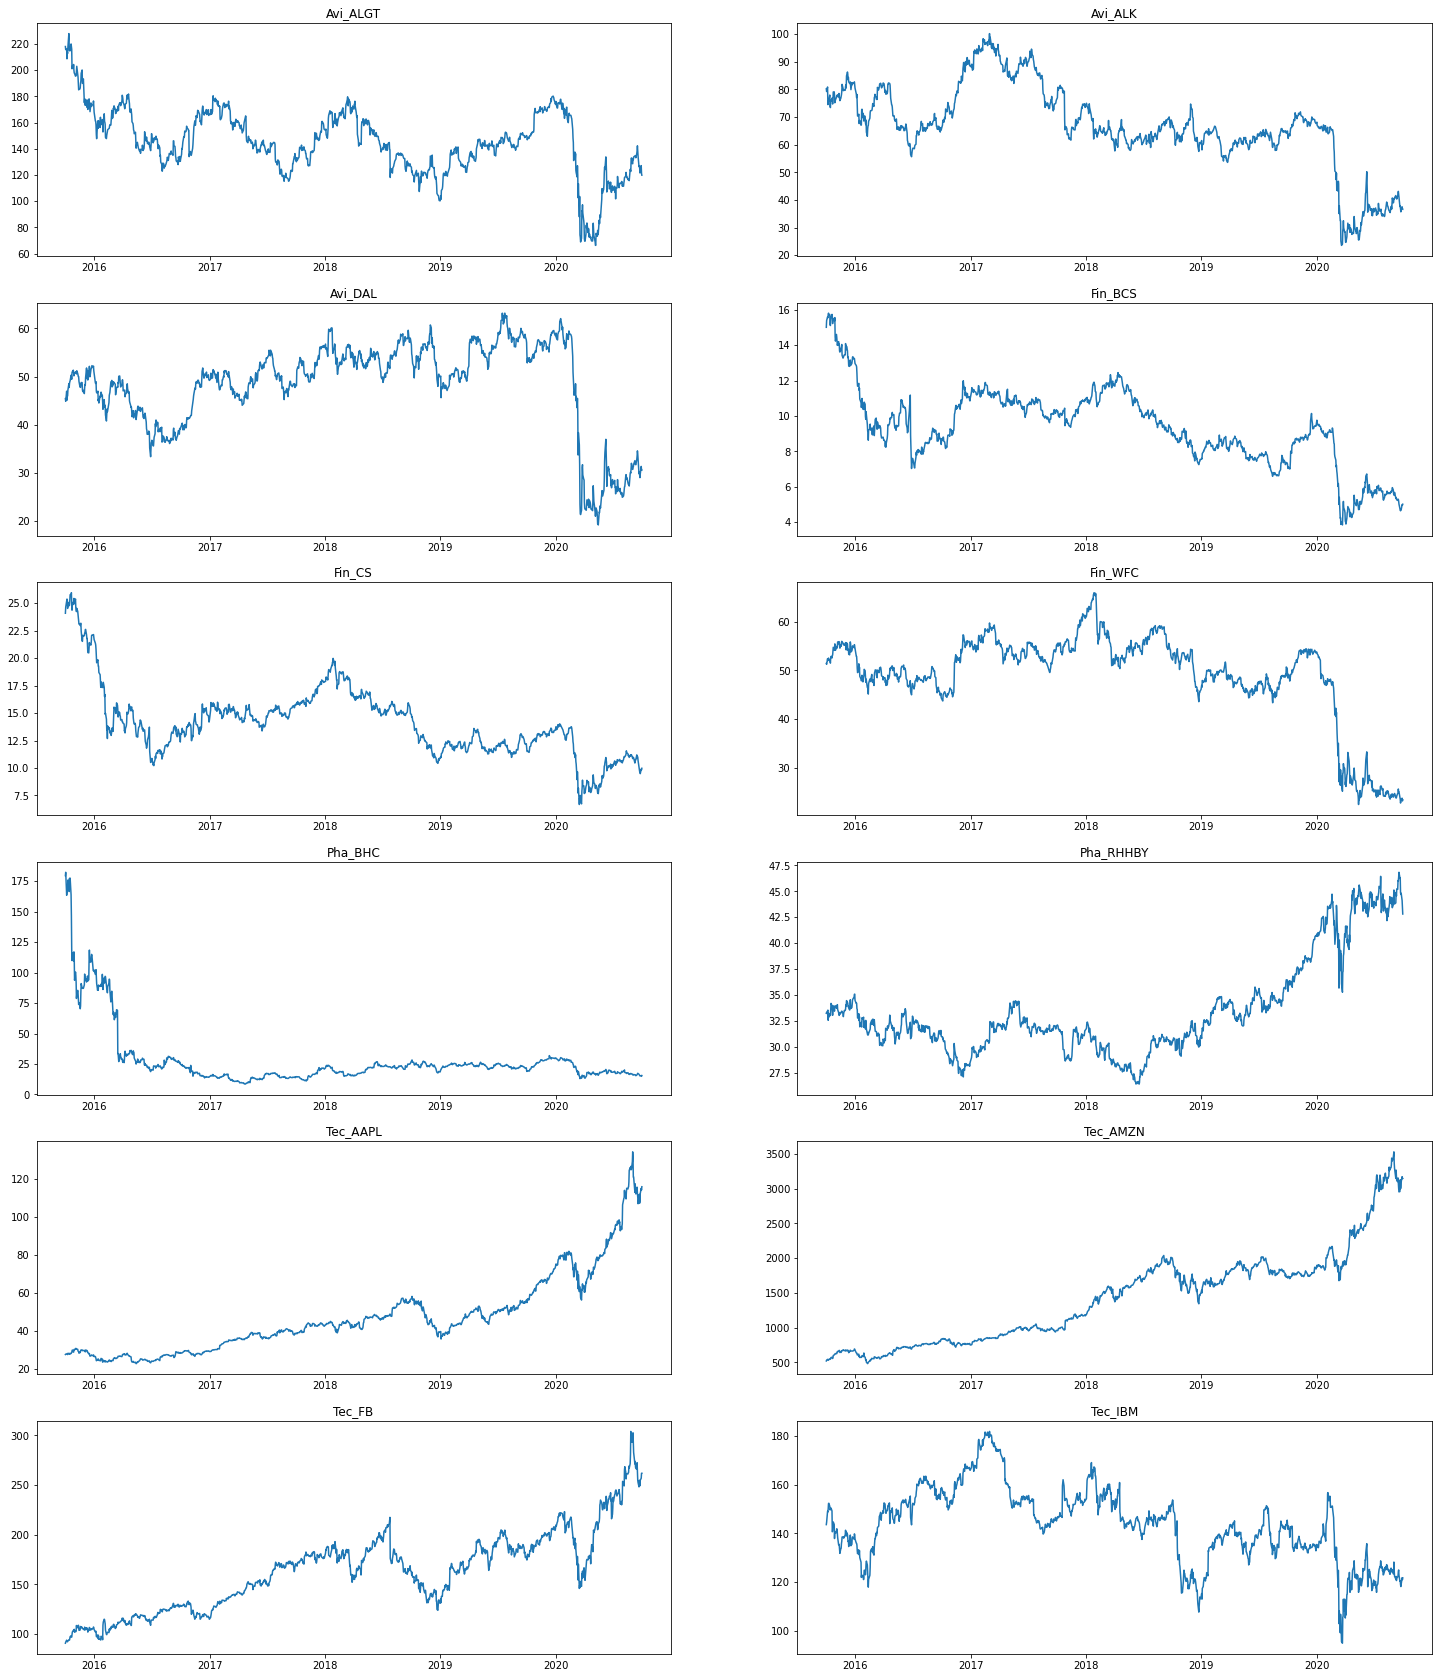

In [50]:
# Lets plot these stocks with outliers on a trend chart and see if there are any real outliers
fig = plt.figure(figsize =(25, 30))
ax = fig.add_subplot(111)
i = 1
for share in share_with_outliers:
    plt.subplot(6,2,i)
    i += 1
    # Creating plot
    plt.plot(stock_data_five_year[share]) # Drawing Line-chart
    plt.title(share)
         
# show plot
plt.show()

Observations:

* Based on trend analysis, we will review each stock
* All 3 Aviation stocks see a major decline around 2020, which would have resulted in extreme data. This is potentially due to COVID which impacted travel industry
* All 3 Finance stocks have multiple peaks and troughs, 2020 seriously hitting them all. But even under other lows, we can see surrounding values having similar values, therefore not being incorrect records.
* Pha_BHC has seen an immense decline at the start of 5 years and never recovered. The data in box plot is skewed due to the decline but we can see no clear incorrect record.
* Pha_RHHBY has grown significantly towards late 2019 and therefore showed outliers in box plot. No record falls too far from overall trend of stock so isn't incorrect
* Tech firms have seen a growth across the period with higher jumps in 2020. This could be due to the online switch of all age groups during COVID and increase in IT jobs
* IBM does not follow the same pattern and has continuously shown an unstable performance across the half decade and worsening since 2020

### Preparing columns for technical analysis

* We have loaded the data, cleaned it and tested for outliers
* The next step is to add columns in the dataset which would facilitate technical stock analysis

##### Adding columns for daily returns, relative returns and normalized rates
* Daily returns - The closing rate of a stock compared against the closing rate from the day before
* Relative returns - The closing rate of a stock compared against the closing rate of the market index on the day
* Normalized rate - The normalized rate of each day of a stock is calculated while keeping Day 1 as base value of 1 and calculating returns based off it


In [51]:
# Create columns for daily return and relative return for each stock
for share in stock_data_five_year.columns:
    if not(share.endswith('_Vol')):
        stock_data_five_year[share+'_ret'] = stock_data_five_year[share]/stock_data_five_year[share].shift(1) - 1
        stock_data_five_year[share+'_nor'] = stock_data_five_year[share]/(stock_data_five_year[share].loc[stock_data_five_year.index[0]])
        if share != 'S&P500':
            stock_data_five_year[share + '_rel'] = stock_data_five_year[share]/stock_data_five_year['S&P500']

# Checking the data through Avi_AAL stock columns 
stock_data_five_year[['Tec_GOOG','Tec_GOOG_ret','Tec_GOOG_rel','Tec_GOOG_nor']].head()

,Tec_GOOG,Tec_GOOG_ret,Tec_GOOG_rel,Tec_GOOG_nor
Date,,,,
2015-10-01,611.289978,NaN,0.317748,1.000000
2015-10-02,626.909973,0.025553,0.321268,1.025553
2015-10-05,641.469971,0.023225,0.322825,1.049371
2015-10-06,645.440002,0.006189,0.325993,1.055866
2015-10-07,642.359985,-0.004772,0.321851,1.050827


__The main dataframe 'stock_data_five_year', with all the required columns, has been created after thoroughly cleaning and refining it. It will be shared as csv later for reporting__

##### Creating a new dataframe for descriptive statistics of the stocks

* Now that the main dataframe is ready, we need to create a second dataframe
* This dataframe will contain records at the stock level with some key descriptive stats and metrics
* These columns will be required for risk assessment, portfolio returns and risk calculations and reporting needs

In [52]:
# Read annexure file to get stock level columns - their names, domain and codes
stocks = pd.read_csv('Annexure-I.csv')
stocks.shape

(24, 3)

In [53]:
# Lets see the dataset
stocks

,Ticker,Industry,Company Name
0,AAL,Aviation,American Airlines Group Inc
1,ALGT,Aviation,Allegiant Travel Company
2,ALK,Aviation,Alaska Air Group Inc
3,DAL,Aviation,Delta Air Lines Inc
4,HA,Aviation,Hawaiian Holdings Inc
5,LUV,Aviation,Southwest Airlines Co
6,BCS,Finance,Barclays
7,CS,Finance,Credit Suisse
8,DB,Finance,Deutsche Bank
9,GS,Finance,Goldman Sachs


In [54]:
# Adding a row in the dataframe for the market index
stocks.index = stocks.index + 1                                     # Shifting index
stocks.loc[0] = ['S&P500', 'Market', 'S&P500']     # Adding record for market index as the first row
stocks = stocks.sort_index()                                        # sorting by index

In [55]:
# Lets look at the dataset again
stocks

,Ticker,Industry,Company Name
0,S&P500,Market,S&P500
1,AAL,Aviation,American Airlines Group Inc
2,ALGT,Aviation,Allegiant Travel Company
3,ALK,Aviation,Alaska Air Group Inc
4,DAL,Aviation,Delta Air Lines Inc
5,HA,Aviation,Hawaiian Holdings Inc
6,LUV,Aviation,Southwest Airlines Co
7,BCS,Finance,Barclays
8,CS,Finance,Credit Suisse
9,DB,Finance,Deutsche Bank


In [56]:
# Updating Tickers to keep it in sync with main dataframe

stocks['Code'] = (np.where(stocks.Industry == 'Market', '',
                                    np.where(stocks.Industry == 'Healthcare', 'Pha_',
                                            stocks.Industry.str[:3] + '_')) + stocks.Ticker).str.strip()
stocks = stocks[['Industry', 'Code', 'Company Name']]

stocks.head()

,Industry,Code,Company Name
0,Market,S&P500,S&P500
1,Aviation,Avi_AAL,American Airlines Group Inc
2,Aviation,Avi_ALGT,Allegiant Travel Company
3,Aviation,Avi_ALK,Alaska Air Group Inc
4,Aviation,Avi_DAL,Delta Air Lines Inc


##### Adding new metrics as mentioned earlier for portfolio assessment

* Stock Average Returns - It measures the average returns of an individual stock over a period of time
* Stock Standard Deviation (Risk) - It measures the risk of a stock by getting the mean square error of the data
* Stock Cumulative Return - It provides aggregate gains earned by investor by using the ratio of current stock price to purchase price

In [57]:
stocks['Average Returns'] = ''
stocks['Risk'] = ''
stocks['Cumulative Return'] = ''
Code_list = stocks.Code.tolist()
stocks = stocks.set_index('Code')
for stock in Code_list:
    stocks.loc[stock,'Average Returns'] = stock_data_five_year[stock+'_ret'].mean()
    stocks.loc[stock,'Risk'] = stock_data_five_year[stock+'_ret'].std()
    stocks.loc[stock,'Cumulative Return'] = stock_data_five_year[stock+'_nor'].loc[stock_data_five_year.index[-1]] - 1

stocks

,Industry,Company Name,Average Returns,Risk,Cumulative Return
Code,,,,,
S&P500,Market,S&P500,0.000517,0.01208,0.748085
Avi_AAL,Aviation,American Airlines Group Inc,-0.000336,0.034725,-0.68648
Avi_ALGT,Aviation,Allegiant Travel Company,-0.000047,0.029101,-0.450408
Avi_ALK,Aviation,Alaska Air Group Inc,-0.000256,0.026907,-0.543438
Avi_DAL,Aviation,Delta Air Lines Inc,0.000042,0.026478,-0.32658
Avi_HA,Aviation,Hawaiian Holdings Inc,0.000034,0.033132,-0.478771
Avi_LUV,Aviation,Southwest Airlines Co,0.000245,0.022913,-0.023692
Fin_BCS,Finance,Barclays,-0.000548,0.025119,-0.666223
Fin_CS,Finance,Credit Suisse,-0.000437,0.022842,-0.586135


##### Calculating Sharpe Ratio for each stock

* Sharpe Ratio is an index for measuring risk-adjusted return
* It is calculated as ('Return of stock' - 'Risk free interest')/'Risk of the stock'
* We will be taking 0.75% as the risk free rate and as it is over the period of an year, we will annualize the returns and risk calculated earlier
* The annualization is done by multiplying by the working days in an year i.e. 252

In [58]:
stocks['Sharpe Ratio'] = ''
stocks['Annualized Returns'] = ''
for stock in stocks.index:
    stocks.loc[stock,'Annualized Returns'] = stocks.loc[stock,'Average Returns']*252
    stocks.loc[stock,'Sharpe Ratio'] = ((stocks.loc[stock,'Average Returns']*252)-0.0075)/(stocks.loc[stock,'Risk']*15.8745)

stocks

,Industry,Company Name,Average Returns,Risk,Cumulative Return,Sharpe Ratio,Annualized Returns
Code,,,,,,,
S&P500,Market,S&P500,0.000517,0.01208,0.748085,0.640923,0.130407
Avi_AAL,Aviation,American Airlines Group Inc,-0.000336,0.034725,-0.68648,-0.167261,-0.084701
Avi_ALGT,Aviation,Allegiant Travel Company,-0.000047,0.029101,-0.450408,-0.041916,-0.011863
Avi_ALK,Aviation,Alaska Air Group Inc,-0.000256,0.026907,-0.543438,-0.168439,-0.064446
Avi_DAL,Aviation,Delta Air Lines Inc,0.000042,0.026478,-0.32658,0.007222,0.010536
Avi_HA,Aviation,Hawaiian Holdings Inc,0.000034,0.033132,-0.478771,0.002146,0.008629
Avi_LUV,Aviation,Southwest Airlines Co,0.000245,0.022913,-0.023692,0.148839,0.061638
Fin_BCS,Finance,Barclays,-0.000548,0.025119,-0.666223,-0.36537,-0.13819
Fin_CS,Finance,Credit Suisse,-0.000437,0.022842,-0.586135,-0.324197,-0.110054


In [59]:
# Adding date of selling of stocks (to be used for reporting needs)

stocks['Last_Traded'] = stock_data_five_year.index[-1]
stocks

,Industry,Company Name,Average Returns,Risk,Cumulative Return,Sharpe Ratio,Annualized Returns,Last_Traded
Code,,,,,,,,
S&P500,Market,S&P500,0.000517,0.01208,0.748085,0.640923,0.130407,2020-09-30
Avi_AAL,Aviation,American Airlines Group Inc,-0.000336,0.034725,-0.68648,-0.167261,-0.084701,2020-09-30
Avi_ALGT,Aviation,Allegiant Travel Company,-0.000047,0.029101,-0.450408,-0.041916,-0.011863,2020-09-30
Avi_ALK,Aviation,Alaska Air Group Inc,-0.000256,0.026907,-0.543438,-0.168439,-0.064446,2020-09-30
Avi_DAL,Aviation,Delta Air Lines Inc,0.000042,0.026478,-0.32658,0.007222,0.010536,2020-09-30
Avi_HA,Aviation,Hawaiian Holdings Inc,0.000034,0.033132,-0.478771,0.002146,0.008629,2020-09-30
Avi_LUV,Aviation,Southwest Airlines Co,0.000245,0.022913,-0.023692,0.148839,0.061638,2020-09-30
Fin_BCS,Finance,Barclays,-0.000548,0.025119,-0.666223,-0.36537,-0.13819,2020-09-30
Fin_CS,Finance,Credit Suisse,-0.000437,0.022842,-0.586135,-0.324197,-0.110054,2020-09-30


__All columns are now prepared in both dataframes__

#### Writing the dataframes into CSVs for reporting

In [60]:
# First exporting the main dataset
stock_data_five_year.to_csv('Stock_data_five_year.csv')

In [61]:
# Now, for the second dataset, we will write it as two CSVs - one for the market stats and the second for the rest

market = pd.DataFrame(stocks.loc['S&P500']).transpose()

market.to_csv('Market.csv')

stocks = pd.DataFrame(stocks.iloc[1::])

stocks.to_csv('Stocks.csv')

#### Some Key Points

* As part of this notebook, we have prepared three dataframes which have the entire available database, cleaned and with additional columns for analyses
* Hereafter, we will be leveraging these datasets in a Tableau dashboard where all the reporting needs would be handled
* The dashboard will be prepared for an interactive experience and portfolio selections for ouor clients will also be driven through the same
* All our insights will then be articulated properly in the client presentation